In [2]:
import pandas as pd
import scipy.stats
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
start_time = dt.datetime.now()

In [3]:
data = pd.read_csv('card transactions.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96753 entries, 0 to 96752
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recnum             96753 non-null  int64  
 1   Cardnum            96753 non-null  int64  
 2   Date               96753 non-null  object 
 3   Merchnum           93378 non-null  object 
 4   Merch description  96753 non-null  object 
 5   Merch state        95558 non-null  object 
 6   Merch zip          92097 non-null  float64
 7   Transtype          96753 non-null  object 
 8   Amount             96753 non-null  float64
 9   Fraud              96753 non-null  int64  
 10  Unnamed: 10        0 non-null      float64
 11  Unnamed: 11        0 non-null      float64
 12  Unnamed: 12        0 non-null      float64
 13  Unnamed: 13        0 non-null      float64
 14  Unnamed: 14        0 non-null      float64
 15  Unnamed: 15        0 non-null      float64
 16  Unnamed: 16        0 n

In [57]:
data.describe(include='all')

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
count,96753.000000,9.675300e+04,96753,93378,96753,95558,92097.000000,96753,9.675300e+04,96753.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,NaN,NaN,365,13091,13126,227,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2/28/10,930090121224,GSA-FSS-ADV,TN,NaN,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,684,9310,1688,12035,NaN,96398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,48377.000000,5.142202e+09,NaN,NaN,NaN,NaN,44706.596740,NaN,4.278857e+02,0.010945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,27930.329635,5.567084e+04,NaN,NaN,NaN,NaN,28369.537945,NaN,1.000614e+04,0.104047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,5.142110e+09,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000e-02,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,24189.000000,5.142152e+09,NaN,NaN,NaN,NaN,20855.000000,NaN,3.348000e+01,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,48377.000000,5.142196e+09,NaN,NaN,NaN,NaN,38118.000000,NaN,1.379800e+02,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,72565.000000,5.142246e+09,NaN,NaN,NaN,NaN,63103.000000,NaN,4.282000e+02,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
data.dtypes

Recnum                 int64
Cardnum                int64
Date                  object
Merchnum              object
Merch description     object
Merch state           object
Merch zip            float64
Transtype             object
Amount               float64
Fraud                  int64
Unnamed: 10          float64
Unnamed: 11          float64
Unnamed: 12          float64
Unnamed: 13          float64
Unnamed: 14          float64
Unnamed: 15          float64
Unnamed: 16          float64
Unnamed: 17          float64
dtype: object

In [59]:
data.head(10)

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,5142183973,1/1/10,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,5142131721,1/1/10,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,5142148452,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,5142149874,1/1/10,5509006296254,FEDEX SHP 12/22/09 AB#,TN,38118.0,P,3.67,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,5142189277,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,5142191182,1/1/10,6098208200062,MIAMI COMPUTER SUPPLY,OH,45429.0,P,230.32,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,5142258629,1/1/10,602608969534,FISHER SCI ATL,GA,30091.0,P,62.11,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
data.dropna(how = "all", axis = 1, inplace = True)
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96753 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96753 non-null  int64         
 1   Cardnum            96753 non-null  int64         
 2   Date               96753 non-null  datetime64[ns]
 3   Merchnum           93378 non-null  object        
 4   Merch description  96753 non-null  object        
 5   Merch state        95558 non-null  object        
 6   Merch zip          92097 non-null  float64       
 7   Transtype          96753 non-null  object        
 8   Amount             96753 non-null  float64       
 9   Fraud              96753 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 7.4+ MB


In [61]:
numerics = ['Date','Amount']
categoricals  = ['Recnum','Cardnum','Merchnum','Merch description','Merch state','Merch zip','Transtype']

In [62]:
categorical_data = data.loc[:, categoricals]
populated2 = categorical_data.notna().mean()
zeros = categorical_data[categoricals] == '0'
blank = categorical_data.isnull()
unique = categorical_data.nunique(axis = 0)
mode = categorical_data.mode().iloc[0,:]
cate_summary = pd.DataFrame(data = {"% Populated":(populated2*100).round(2), "# blank":blank.sum(),'# zeros':zeros.sum(),
                                   '# Unique Values': unique.round(2),'Most Common Value':mode})
cate_summary['# Unique Values'] = cate_summary['# Unique Values'].apply(lambda x:'{:,}'.format(x))
cate_summary

,% Populated,# blank,# zeros,# Unique Values,Most Common Value
Recnum,100.00,0,0,"96,753",1
Cardnum,100.00,0,0,"1,645",5142148452.0
Merchnum,96.51,3375,231,"13,091",930090121224
Merch description,100.00,0,0,"13,126",GSA-FSS-ADV
Merch state,98.76,1195,0,227,TN
Merch zip,95.19,4656,0,"4,567",38118.0
Transtype,100.00,0,0,4,P


In [77]:
data[['Amount']].count

<bound method DataFrame.count of         Amount
0         3.62
1        31.42
2       178.49
3         3.62
4         3.62
...        ...
96748    84.79
96749   118.75
96750   363.56
96751  2202.03
96752   554.64

[96753 rows x 1 columns]>

Text(0.5, 1.0, 'Card Number')

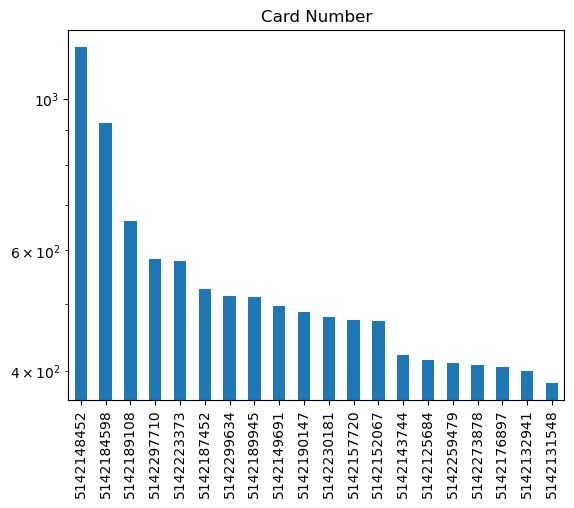

In [69]:
cardnum = data['Cardnum'].value_counts().head(20).plot(kind='bar',logy=True)
cardnum.set_title('Card Number')

In [82]:
data['Cardnum'].value_counts()[5142148452]

1192

Text(0.5, 1.0, 'Merchandise Number')

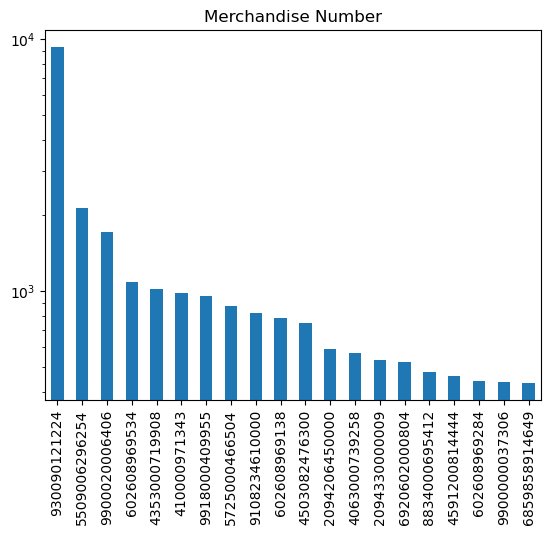

In [86]:
merchnum = data['Merchnum'].value_counts().head(20).plot(kind='bar',logy=True)
merchnum.set_title('Merchandise Number')

In [9]:
data['Merchnum'].value_counts()['930090121224']
# data.loc[data['Merchnum'] == '930090121224', 'Merchnum'] = data.loc[data['Merchnum'] == '930090121224', 'Recnum']
# data['Merchnum'] = data['Merchnum'].replace({'0':np.nan})
# data['Merchnum'].isnull().sum()

3606

Text(0.5, 1.0, 'Merchandise Description')

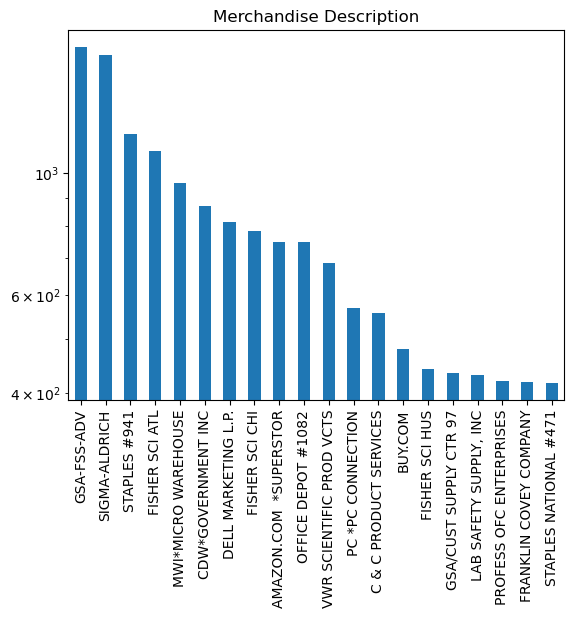

In [70]:
md = data['Merch description'].value_counts().head(20).plot(kind='bar',logy=True)
md.set_title('Merchandise Description')

In [90]:
data['Merch description'].value_counts()['GSA-FSS-ADV']

1688

<AxesSubplot:title={'center':'Daily Transactions'}, xlabel='Date'>

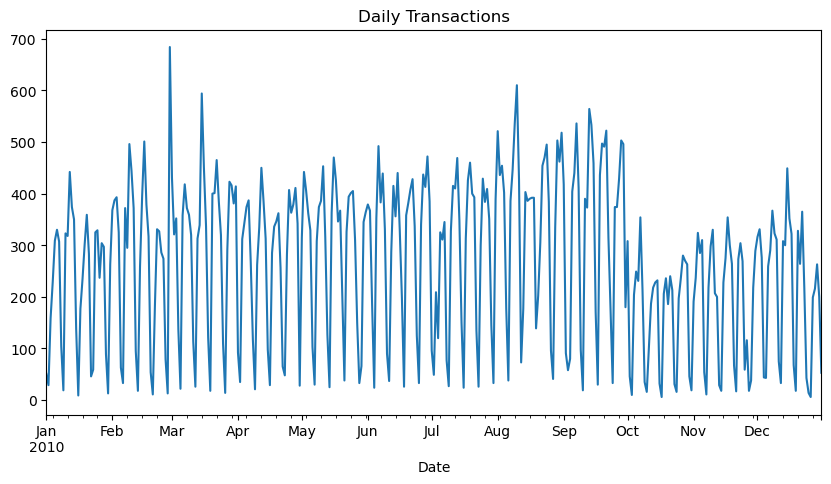

In [76]:
numrecords = len(data)

daily_count = data.assign(trx = np.ones(numrecords)).set_index(data['Date']).resample(dt.timedelta(days = 1))\
    .count().trx
daily_count.plot(title = 'Daily Transactions',figsize = (10,5))

Text(0.5, 1.0, 'Merchandise State')

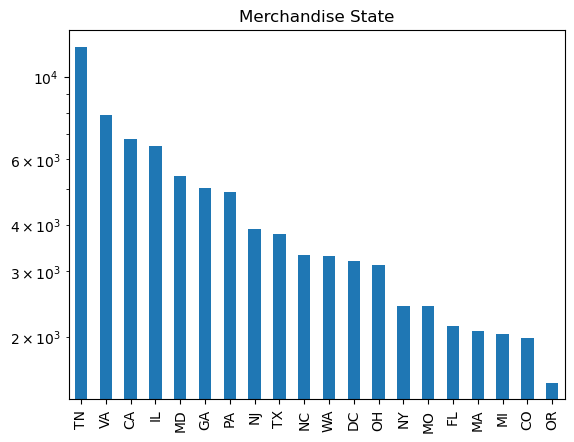

In [91]:
ms = data['Merch state'].value_counts().head(20).plot(kind='bar',logy=True)
ms.set_title('Merchandise State')

In [93]:
data['Merch state'].value_counts()['TN']

12035

Text(0.5, 1.0, 'Merchandise Zip Code')

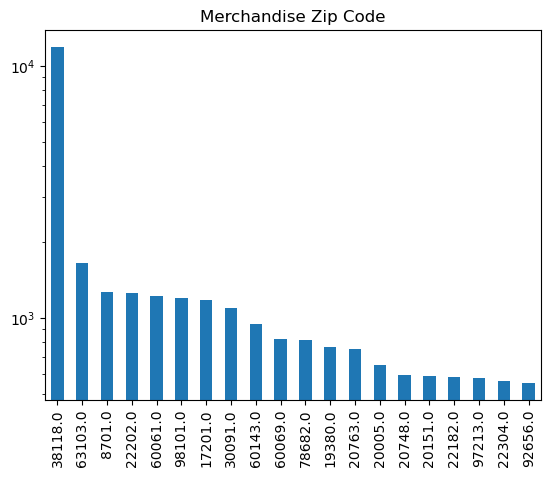

In [72]:
mz = data['Merch zip'].value_counts().head(20).plot(kind='bar',logy=True)
mz.set_title('Merchandise Zip Code')

In [101]:
df2 = data.groupby(['Merch zip'])['Merch zip'].count().reset_index(name="count")
df2
data['Merch zip'].value_counts()[df2['count'].max()]

1

Text(0.5, 1.0, 'Merchandise Zipcode Cleaned')

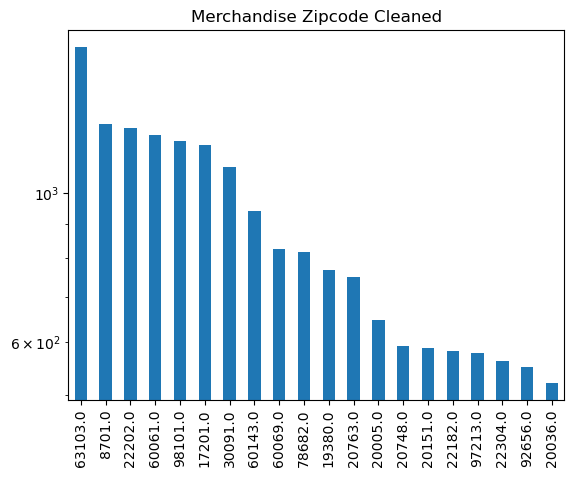

In [74]:
data.loc[data['Merch zip'] == 38118, 'Merch zip'] = data.loc[data['Merch zip'] == 38118, 'Recnum']
mz = data['Merch zip'].value_counts().head(20).plot(kind='bar',logy=True)
plt.yscale('log')
mz.set_title('Merchandise Zipcode Cleaned')

Text(0.5, 1.0, 'Transaction Type')

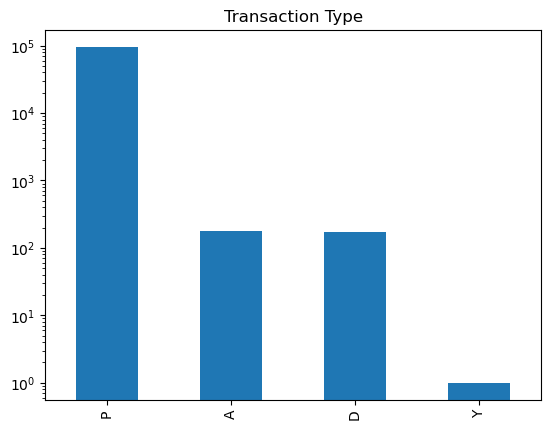

In [75]:
tt = data['Transtype'].value_counts().head(20).plot(kind='bar',logy=True)
tt.set_title('Transaction Type')

In [103]:
data['Transtype'].value_counts()['P']

96398

Text(0.5, 1.0, 'Fraud Label')

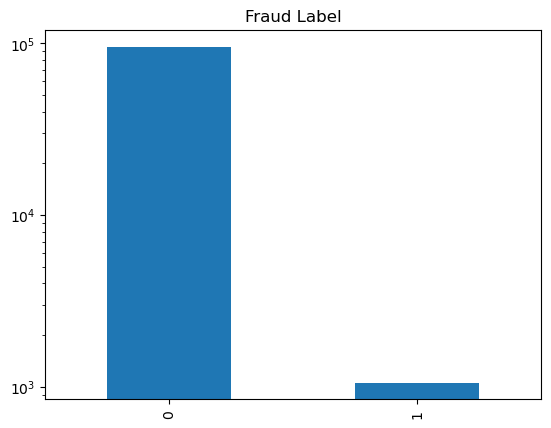

In [121]:
fraud_l = data['Fraud'].value_counts().head(20).plot(kind='bar',logy=True)
fraud_l.set_title('Fraud Label')

In [134]:
col = ["Fraud"]
for i in col:
    print(data[i].isna().sum()/len(data.index))

0.0


In [107]:
data['Fraud'].value_counts()[0]

95694

Text(0.5, 1.0, 'Amount')

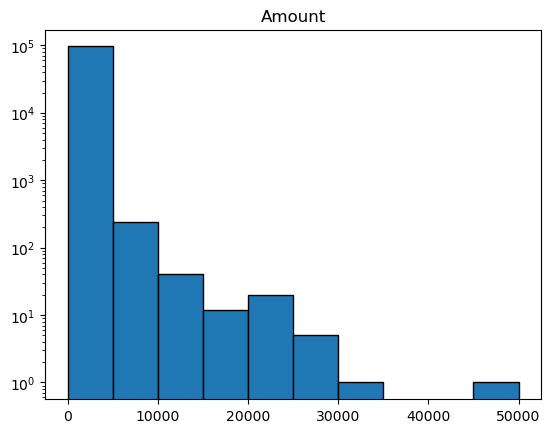

In [133]:
import matplotlib.pyplot as plt
plt.hist(data['Amount'], edgecolor='black',range=[0,50000],bins = 10,log = True)
plt.title('Amount')
# Amount = data['Amount'].value_counts().head(20).plot(kind='bar',logy=True)